# 토마토 꽃 데이터 학습을 위한 프로토 타입 코드


- CNN 학습
- 학습 데이터의 특징
    - 2000개의 이미지를 통한 데이터 학습
    - 500개의 미개화, 500개의 1개화, 500개의 2개화, 500개의 3개화의 데이터를 이용
    - 모든 개화수는 1화방당으로 정의 


### 데이터 준비
##### 현재는 일단 코드 뼈대부터 제작하기 위해 미개화 100개, 개화 1개 100개, 개화 2개 100개의 이미지를 통해 코드 구현 

In [1]:
import glob
# 파라미터에 명시된 저장 경로와 패턴에 해당하는 파일명을 리스트 형식으로 반환하는 glob 사용

In [2]:
class_dirs = ['D:/AIHub/image/test1/전처리 전 폴더/unblossomed_cp', 'D:/AIHub/image/test1/전처리 전 폴더/blossomed_1_cp', 'D:/AIHub/image/test1/전처리 전 폴더/blossomed_2_cp']
class_num = len(class_dirs)
# 현재는 코드 구조를 파악하기 위해 3가지 경우의 폴더만 경로 삽입
# 클래스별 파일 경로

In [3]:
# 이미지 파일 경로와 라벨 저장할 리스트
# 각 클래스 폴더에서 100개씩 이미지 파일 경로를 불러와 image_paths에 저장
image_paths = []
labels = []

In [4]:
# 라벨은 클래스 번호로 지정 (0부터 시작)
for i in range(class_num):
    class_dir = class_dirs[i]
    # '*.jpg'는 .jpg로 끝나는 모든 파일을 의미
    # 만약 다른 형식(.png, .jpeg 등)의 이미지를 사용한다면, 해당 형식에 맞게 변경
    paths = glob.glob(f'{class_dir}/*.jpg')
    for path in paths[:400]:  # 100개만 사용, 이후 이미지 개수가 늘면 [:100]의 수를 바꾸면 됨
        image_paths.append(path)
        labels.append(i)  # 라벨 추가

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
# 이미지를 로드하고, numpy array로 변환
images = [img_to_array(load_img(img, target_size=(480, 270))) for img in image_paths]
images = np.array(images)

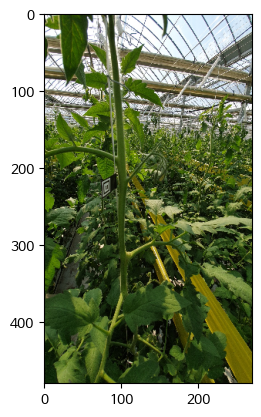

In [7]:
import matplotlib.pyplot as plt
# 첫 번째 이미지를 선택
img = images[100]

# 이미지 확인
plt.imshow(img.astype(int))  # 이미지 데이터는 float 형태이므로 int로 변환
plt.show()

In [8]:
# 라벨을 one-hot encoding
labels = to_categorical(labels)

In [9]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [10]:
# CNN 모델 정의
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(480, 270, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) # 레이블의 클래스 수에 맞게 변경


optimizer = Adam(learning_rate=0.0001)

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 268, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 239, 134, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 239, 134, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 237, 132, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 118, 66, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 64, 64)       3


Epoch 1/20


60/60 [==============================] - 50s 819ms/step - loss: 233.4621 - accuracy: 0.3313 - val_loss: 1.1040 - val_accuracy: 0.3000
Epoch 2/20
60/60 [==============================] - 49s 821ms/step - loss: 1.0939 - accuracy: 0.3344 - val_loss: 1.1027 - val_accuracy: 0.3000
Epoch 3/20
60/60 [==============================] - 50s 830ms/step - loss: 1.0845 - accuracy: 0.3594 - val_loss: 1.1040 - val_accuracy: 0.2750
Epoch 4/20
60/60 [==============================] - 50s 837ms/step - loss: 1.0821 - accuracy: 0.4135 - val_loss: 1.1135 - val_accuracy: 0.2875
Epoch 5/20
60/60 [==============================] - 49s 824ms/step - loss: 0.9921 - accuracy: 0.4979 - val_loss: 1.1267 - val_accuracy: 0.3417
Epoch 6/20
60/60 [==============================] - 49s 823ms/step - loss: 0.7902 - accuracy: 0.6438 - val_loss: 1.4413 - val_accuracy: 0.3167
Epoch 7/20
60/60 [==============================] - 50s 831ms/step - loss: 0.5960 - accuracy: 0.7448 - val_loss: 1.8711 - val_accuracy: 0

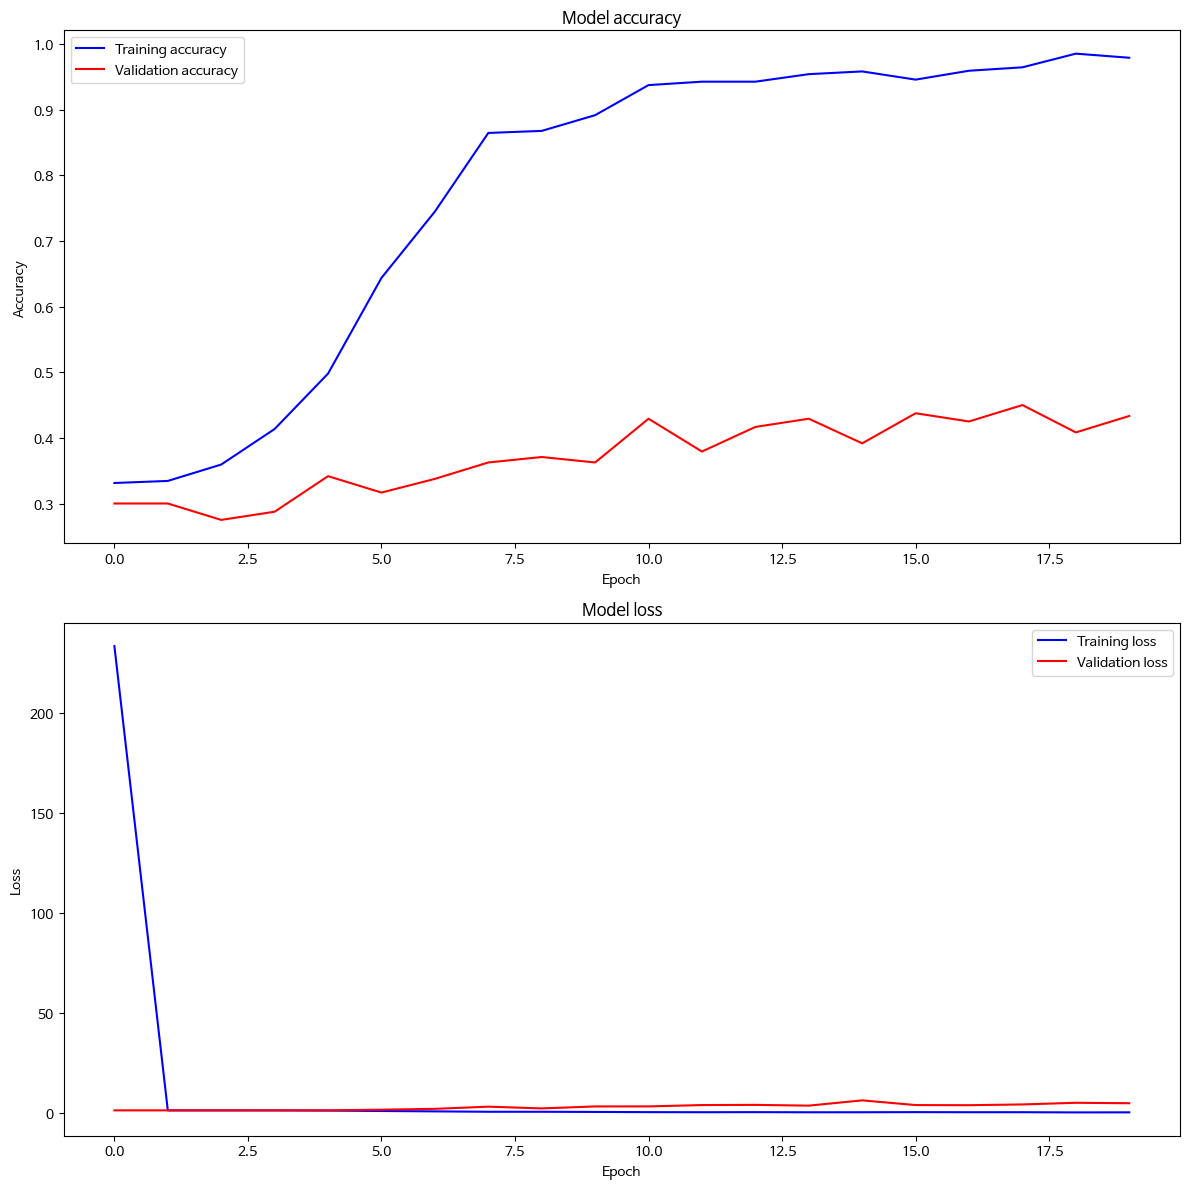

In [12]:
# 모델 학습
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_test, y_test))

# 정확도와 손실률 그래프 그리기
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# 정확도 그래프
ax1.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax1.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax1.set_title("Model accuracy")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epoch")
ax1.legend(loc='best')

# 손실률 그래프
ax2.plot(history.history['loss'], color='b', label="Training loss")
ax2.plot(history.history['val_loss'], color='r', label="Validation loss")
ax2.set_title("Model loss")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epoch")
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

